# Temperature Forecast Project using ML
Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-

https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [11]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [12]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [13]:
df.shape

(7752, 25)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [15]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [16]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [17]:
df.value_counts()

station  Date        Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH    LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  lat      lon      DEM       Slope   Solar radiation  Next_Tmax  Next_Tmin
1.0      01-07-2013  28.3          21.2          72.798576    97.642792    25.276716         21.142562         15.608045  64.914946   0.615612   0.843199   0.810455   0.622040   0.804222    9.933111    0.237004    0.848082    37.6046  126.991  212.3350  2.7850  5987.718750      24.8       18.7         1
17.0     22-07-2013  28.3          23.6          89.580971    95.263687    25.898477         24.780152         8.507048   37.351285   0.773578   0.957905   0.588238   0.522999   0.174743    3.998133    0.030433    0.000000    37.6181  127.099  53.4712   0.6970  5616.770020      26.3       24.2         1
         23-07-2015  29.7          23.4          82.498131    97.344376    26.534669      

In [18]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<Axes: >

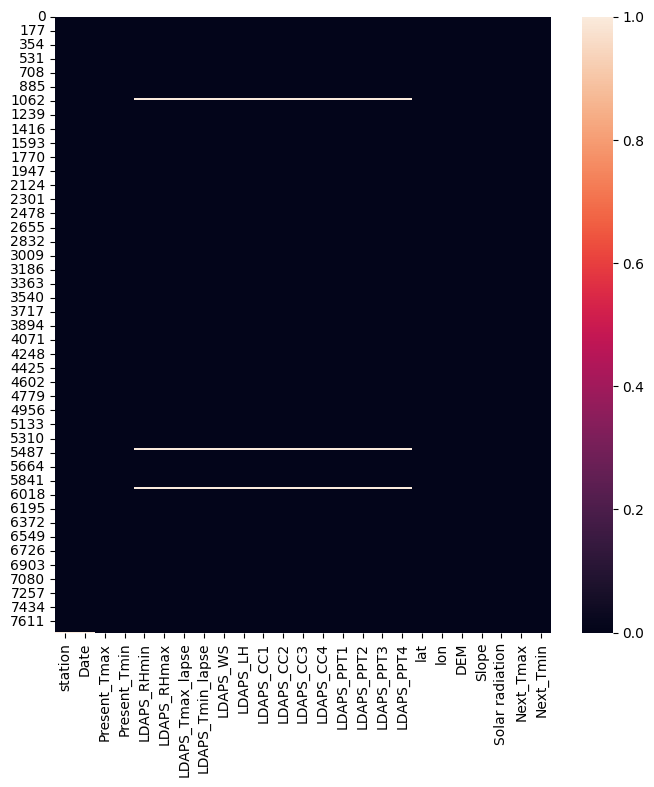

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())

In [20]:
df.dropna(axis=0)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7745     21.0  30-08-2017          23.1          17.8    24.688997   
7746     22.0  30-08-2017          22.5          17.4    30.094858   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936  6.818887   69.451805   
1       90.604721         29.850689         24.035009  5.691890   51.937448   
2       83.973587         30.091292         24.565633  6.138224   20.573050   
3       96.483688         29.704629         23.326177  5.650050   65.727144   
4       90.155128         29.113934         23.486480  5.735004  107.965535   
...           ...               ...               ...       ...         ...   
7745    78.261383         27.812697         18.303014  6.603253    9.614074   
7746    83.690018         26.704905         17.814038  5.768083   82.146707   
7747    78.869858         26.352081         18.775678  6.148918   72.058294   
7748    77.294975         27.010193         18.733519  6.542819   47.241457   
7749    77.243744         27.939516         18.522965  7.289264    9.090034   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...         0.0         0.0         0.0  37.6046  126.991  212.3350   
1     ...         0.0         0.0         0.0  37.6046  127.032   44.7624   
2     ...         0.0         0.0         0.0  37.5776  127.058   33.3068   
3     ...         0.0         0.0         0.0  37.6450  127.022   45.7160   
4     ...         0.0         0.0         0.0  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7745  ...         0.0         0.0         0.0  37.5507  127.040   26.2980   
7746  ...         0.0         0.0         0.0  37.5102  127.086   21.9668   
7747  ...         0.0         0.0         0.0  37.5372  126.891   15.5876   
7748  ...         0.0         0.0         0.0  37.5237  126.909   17.2956   
7749  ...         0.0         0.0         0.0  37.5237  126.970   19.5844   

       Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.7850      5992.895996       29.1       21.2  
1     0.5141      5869.312500       30.5       22.5  
2     0.2661      5863.555664       31.1       23.9  
3     2.5348      5856.964844       31.7       24.3  
4     0.5055      5859.552246       31.2       22.5  
...      ...              ...        ...        ...  
7745  0.5721      4456.024414       27.6       17.7  
7746  0.1332      4441.803711       28.0       17.1  
7747  0.1554      4443.313965       28.3       18.1  
7748  0.2223      4438.373535       28.6       18.8  
7749  0.2713      4451.345215       27.8       17.4  

[7588 rows x 25 columns]

we have left with 7588 rows and 25 columns after dropping missing values

# Statistical Analysis

In [21]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7677.000000  ...  7677.000000  7677.000000  7677.000000  7752.000000   
mean      0.368774  ...     0.485003     0.278200     0.269407    37.544722   
std       0.262458  ...     1.762807     1.161809     1.206214     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146654  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315697  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.575489  ...     0.018364     0.007896     0.000041    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7725.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.128010   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7725.000000  
mean     22.932220  
std       2.487613  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

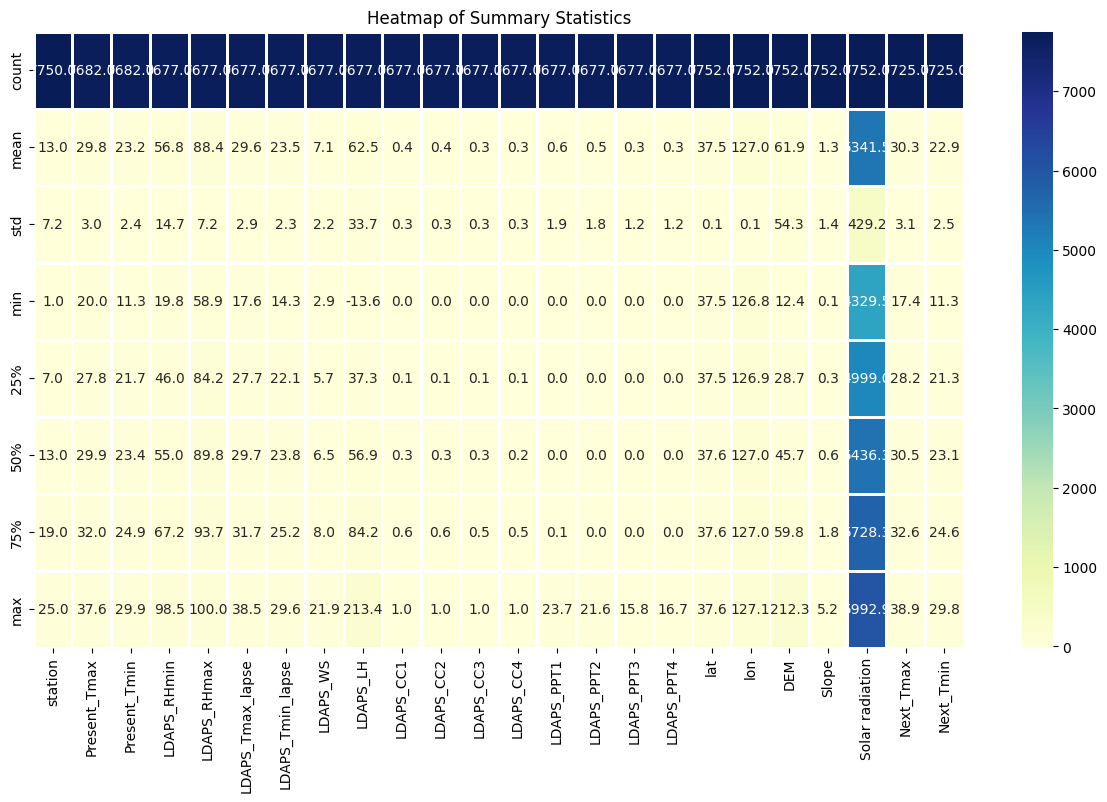

In [22]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.describe(), annot=True, cmap='YlGnBu', fmt=".1f", linewidths=1.8)
plt.title('Heatmap of Summary Statistics')
plt.show()

In [23]:
# Converting Date datatypes and spliting date into date, month and year.
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin   Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2  30.0   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5  30.0   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9  30.0   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3  30.0   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5  30.0   

   Month    Year  
0    6.0  2013.0  
1    6.0  2013.0  
2    6.0  2013.0  
3    6.0  2013.0  
4    6.0  2013.0  

[5 rows x 28 columns]

# Exploratory Data Analysis

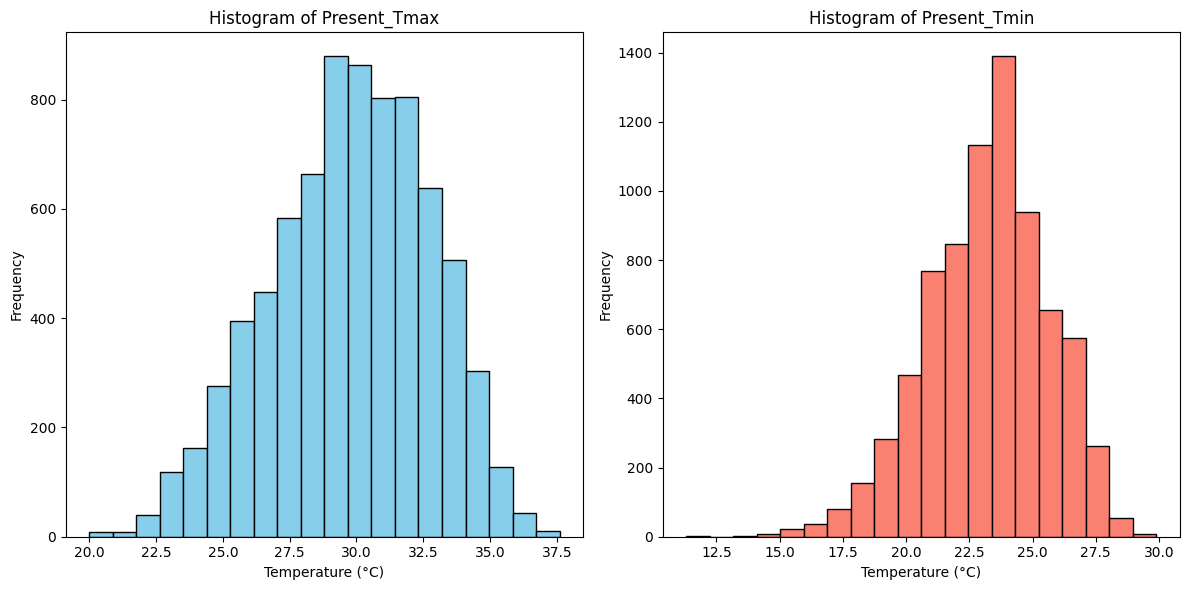

In [24]:
# Extract the columns of interest
present_Tmax = df['Present_Tmax']
present_Tmin = df['Present_Tmin']

# Create a figure with two subplots for each histogram
plt.figure(figsize=(12, 6))

# Histogram for Present_Tmax
plt.subplot(1, 2, 1)
plt.hist(present_Tmax, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Present_Tmax')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Histogram for Present_Tmin
plt.subplot(1, 2, 2)
plt.hist(present_Tmin, bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Present_Tmin')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Adjust layout for subplots
plt.tight_layout()

# Show the histograms
plt.show()


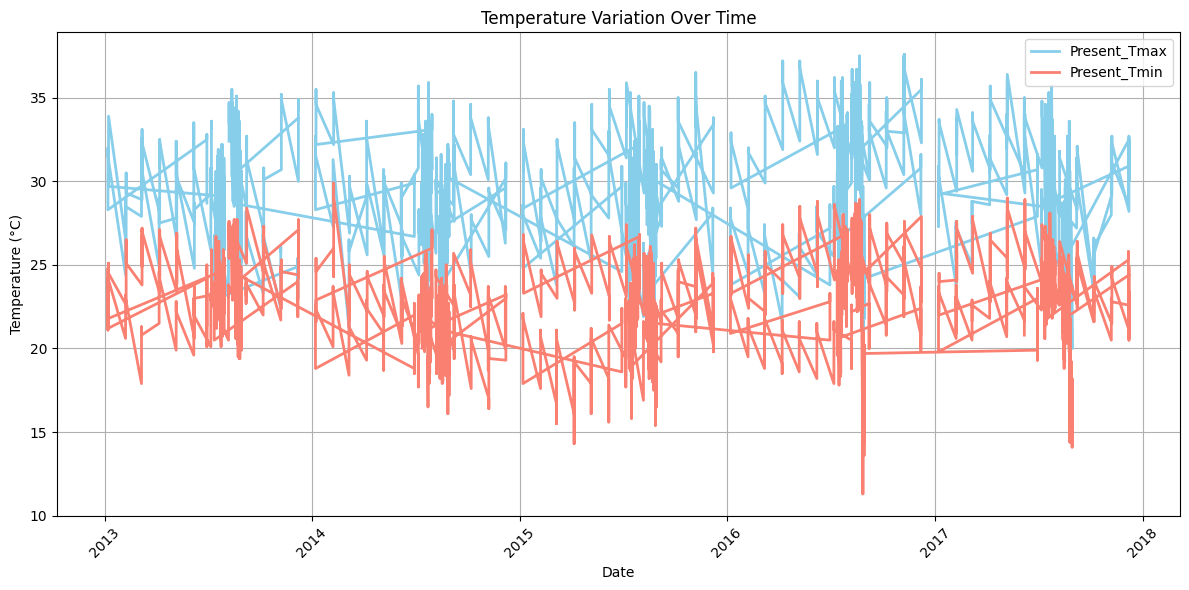

In [25]:

# Extract the timestamp or date column
date_column = df['Date']  # Replace 'Date' with the actual column name

# Extract the temperature columns
present_Tmax = df['Present_Tmax']
present_Tmin = df['Present_Tmin']

# Create a figure and axis
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Plot Present_Tmax
ax.plot(date_column, present_Tmax, label='Present_Tmax', color='skyblue', linewidth=2)

# Plot Present_Tmin
ax.plot(date_column, present_Tmin, label='Present_Tmin', color='salmon', linewidth=2)

# Customize the plot
plt.title('Temperature Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [26]:
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"Value counts for '{column}':")
    print(value_counts)
    print("\n")


Value counts for 'station':
1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64


Value counts for 'Date':
2013-06-30    25
2016-07-18    25
2016-07-25    25
2016-07-24    25
2016-07-23    25
              ..
2014-09-08    25
2014-08-08    25
2014-07-08    25
2014-06-08    25
2017-08-30    25
Name: Date, Length: 310, dtype: int64


Value counts for 'Present_Tmax':
31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64


Value counts for 'Present_Tmin':
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Presen

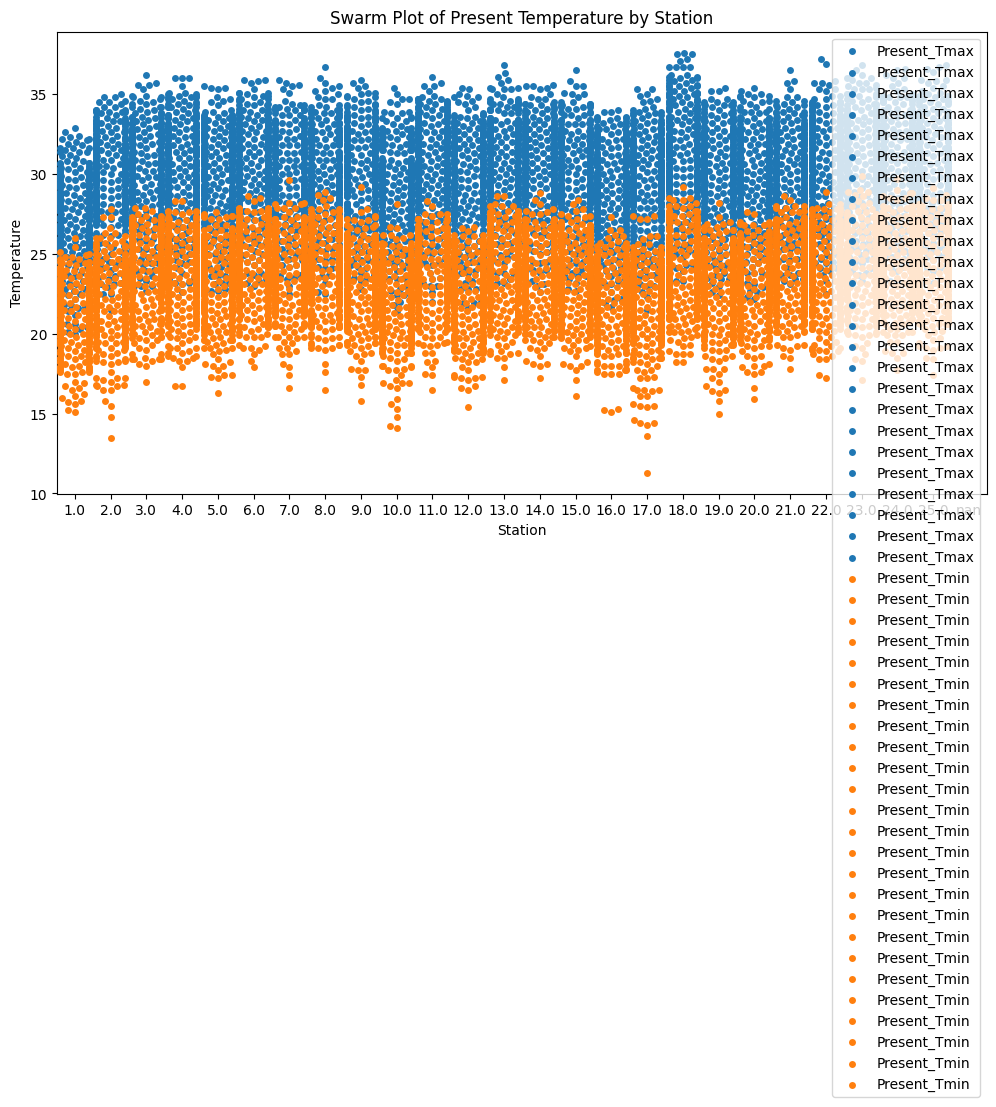

In [27]:


# Specify the columns for Present_Tmax and Present_Tmin
columns_to_plot = ['Present_Tmax', 'Present_Tmin']

# Set the figure size
plt.figure(figsize=(12, 6))

# Loop through each station and create a swarm plot
for column in columns_to_plot:
    sns.swarmplot(x='station', y=column, data=df, label=column)

# Add labels and legend
plt.xlabel('Station')
plt.ylabel('Temperature')
plt.title('Swarm Plot of Present Temperature by Station')
plt.legend()

# Show the plot
plt.show()


<Axes: xlabel='Next_Tmax', ylabel='station'>

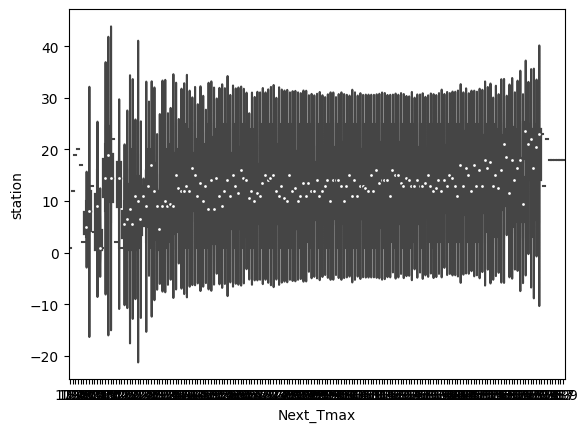

In [28]:
sns.violinplot(x=df['Next_Tmax'], y=df['station'])

<Axes: xlabel='Month', ylabel='Solar radiation'>

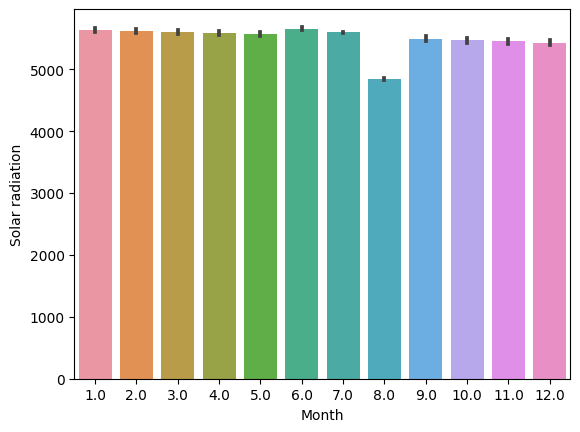

In [29]:
sns.barplot(x=df['Month'], y=df['Solar radiation'])


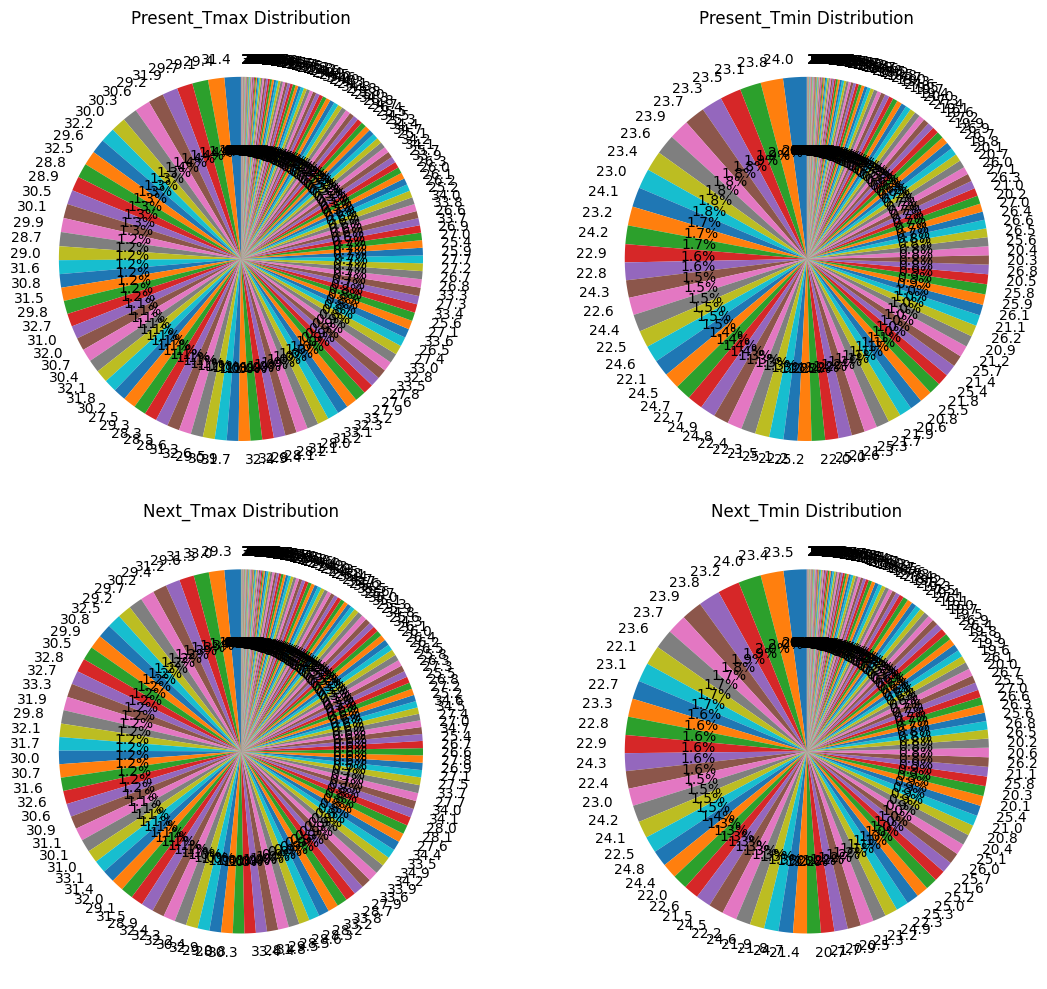

In [30]:


# Specify the columns to create pie plots for
columns_to_plot = ['Present_Tmax', 'Present_Tmin', 'Next_Tmax', 'Next_Tmin']

# Set up subplots for each column
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  # Flatten the 2x2 subplot grid

for i, column in enumerate(columns_to_plot):
    # Calculate the values and labels for the pie chart
    values = df[column].value_counts()
    labels = values.index
    sizes = values.values

    # Create a pie chart for the current column
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{column} Distribution')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


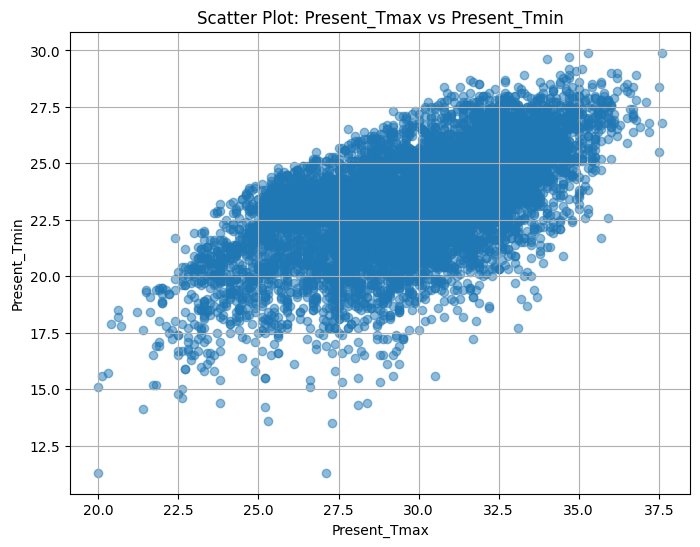

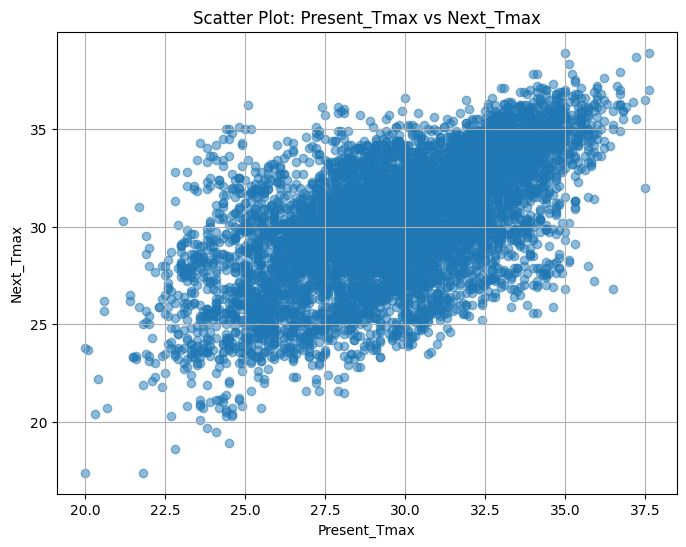

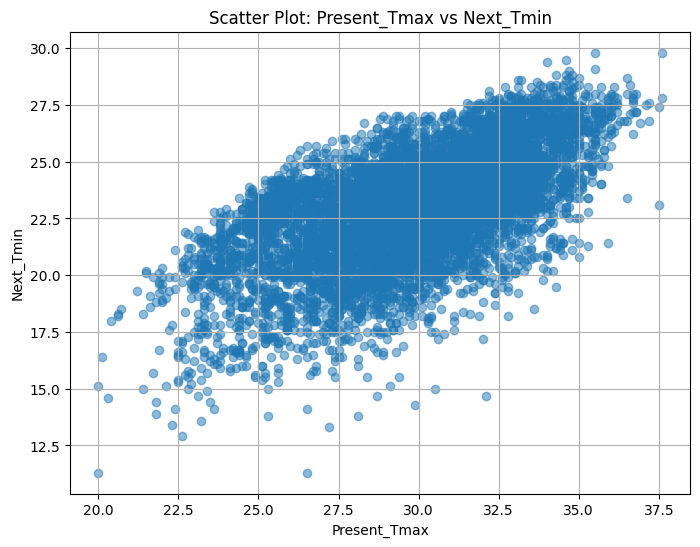

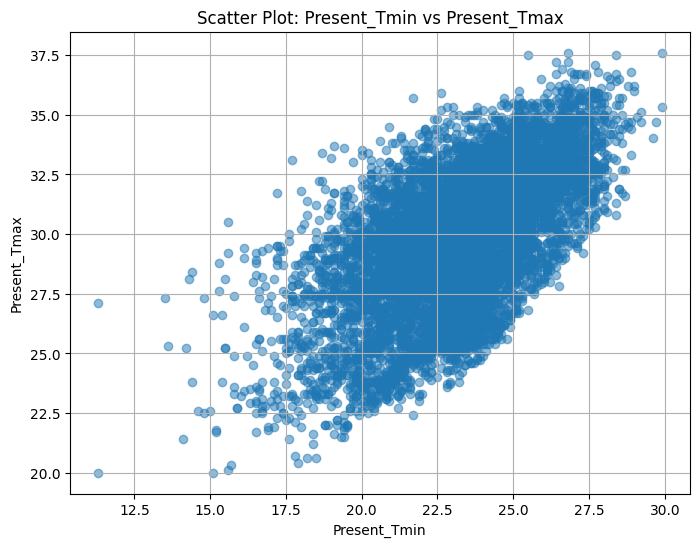

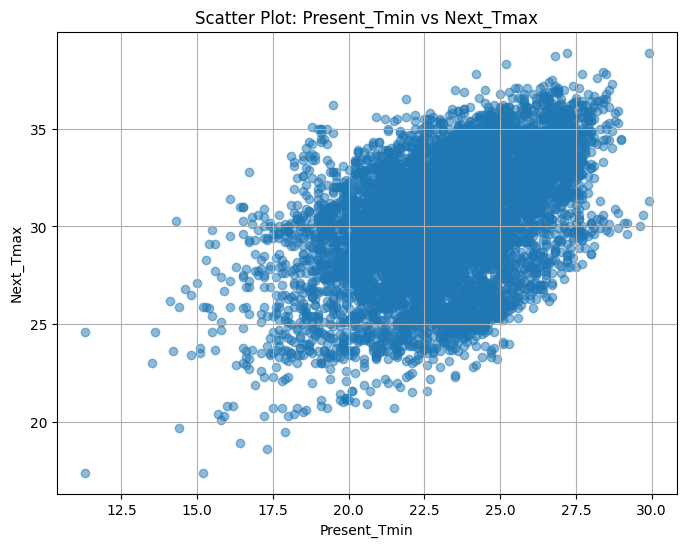

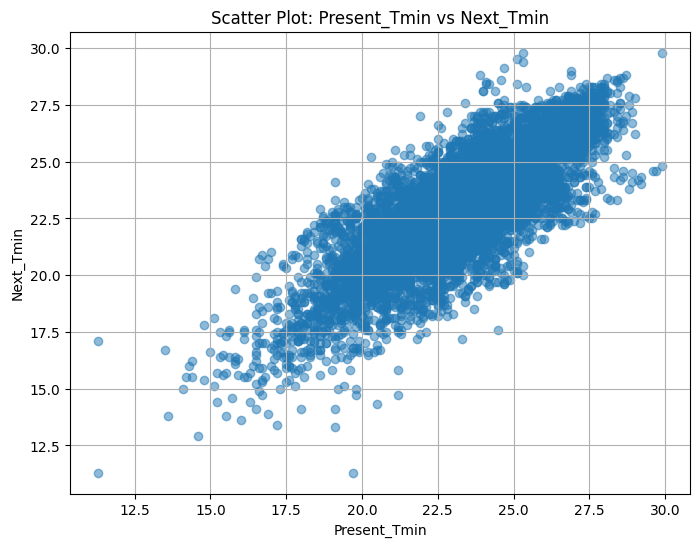

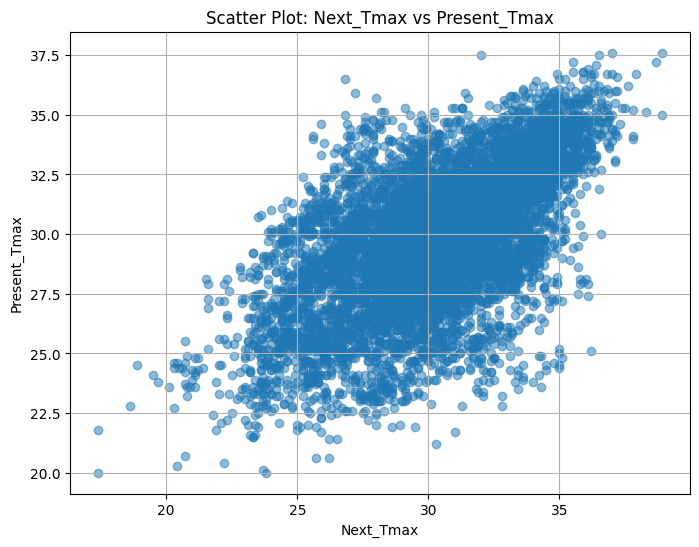

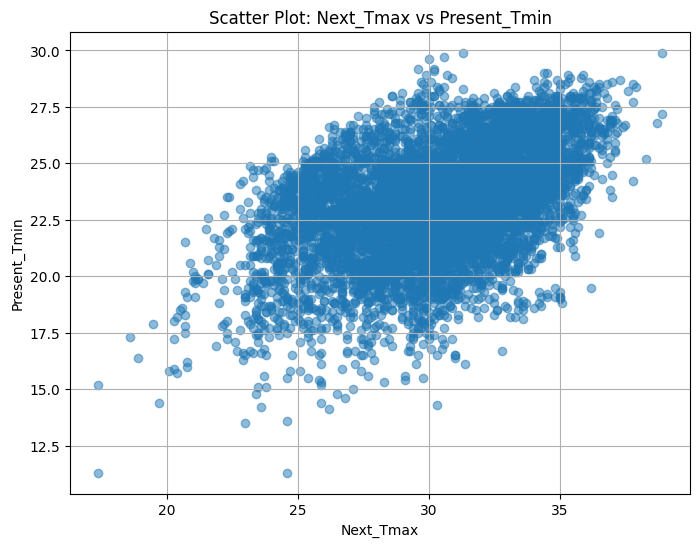

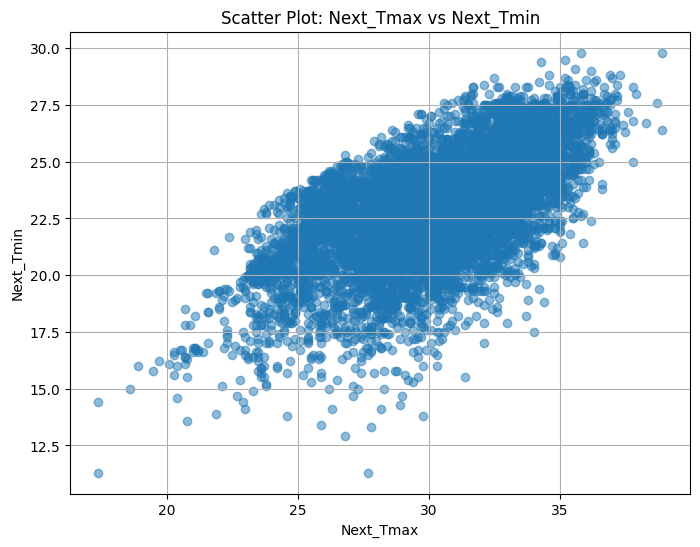

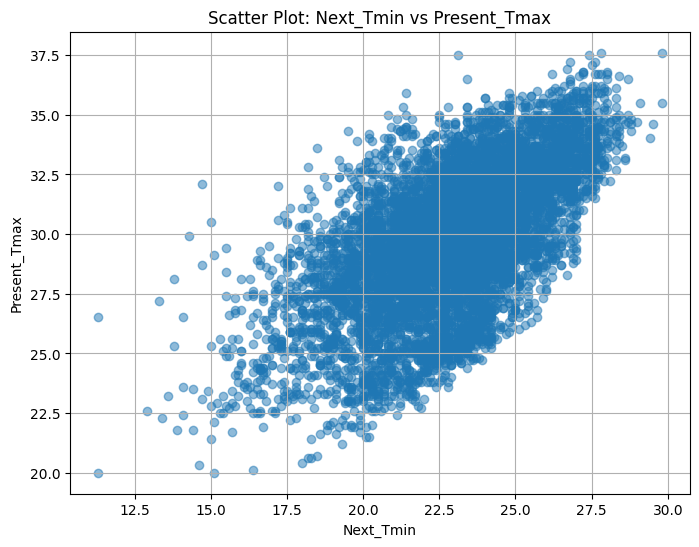

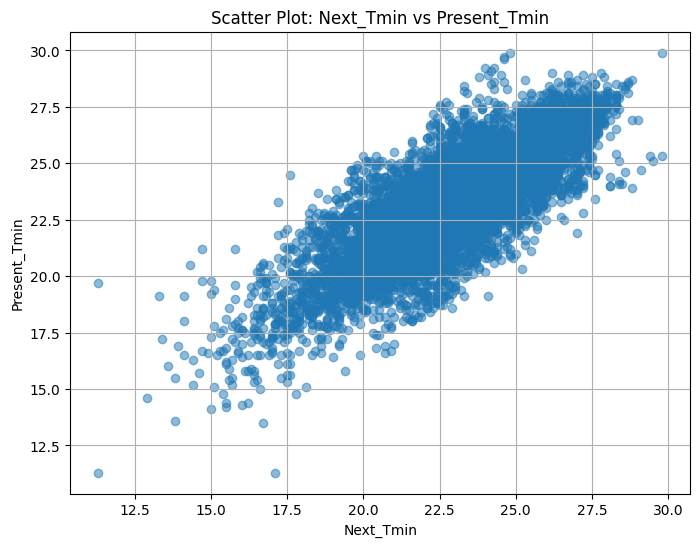

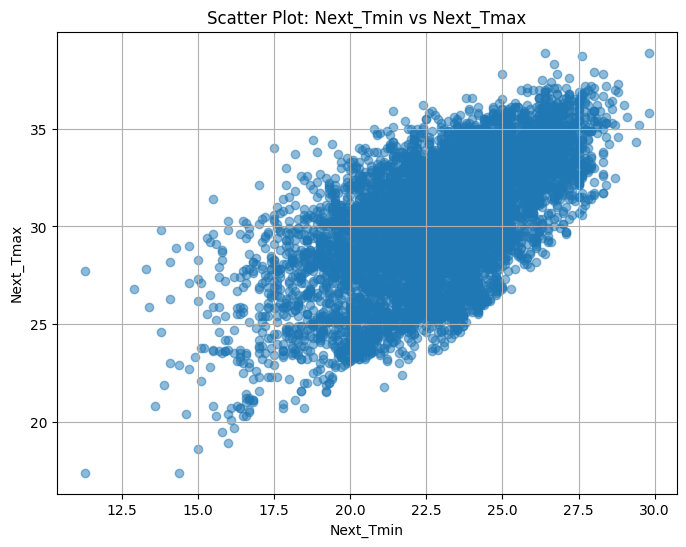

In [31]:


# Specify the columns for the scatter plots
scatter_columns = ['Present_Tmax', 'Present_Tmin', 'Next_Tmax', 'Next_Tmin']

# Create a scatter plot for each column against another column
for x_column in scatter_columns:
    for y_column in scatter_columns:
        if x_column != y_column:
            plt.figure(figsize=(8, 6))
            plt.scatter(df[x_column], df[y_column], alpha=0.5)
            plt.title(f'Scatter Plot: {x_column} vs {y_column}')
            plt.xlabel(x_column)
            plt.ylabel(y_column)
            plt.grid(True)
            plt.show()


<Figure size 800x600 with 0 Axes>

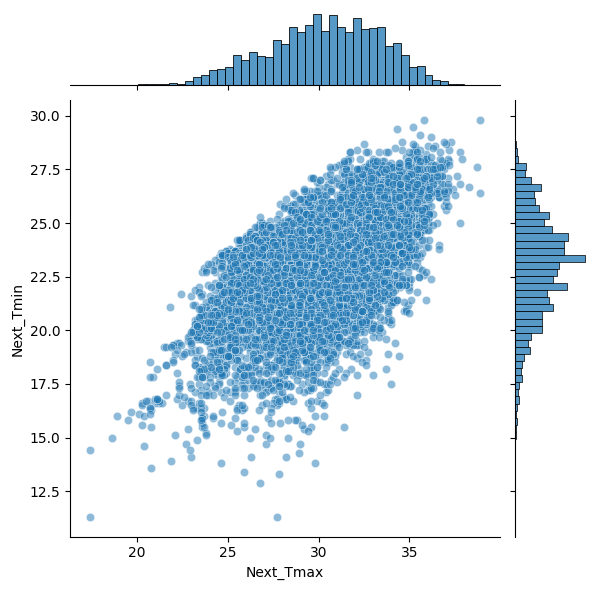

In [32]:


# Specify the columns for the jointplot
x_column = 'Next_Tmax'
y_column = 'Next_Tmin'

# Create a jointplot
plt.figure(figsize=(8, 6))
sns.jointplot(x=df[x_column], y=df[y_column], kind='scatter', alpha=0.5)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()


<Figure size 1000x600 with 0 Axes>

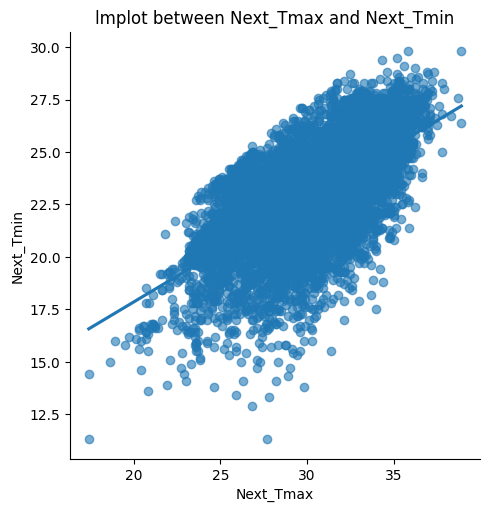

In [33]:


# Specify the columns for the lmplot
x_column = 'Next_Tmax'
y_column = 'Next_Tmin'

# Create an lmplot
plt.figure(figsize=(10, 6))
sns.lmplot(x=x_column, y=y_column, data=df, ci=None, scatter_kws={"alpha": 0.6})
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'lmplot between {x_column} and {y_column}')
plt.show()


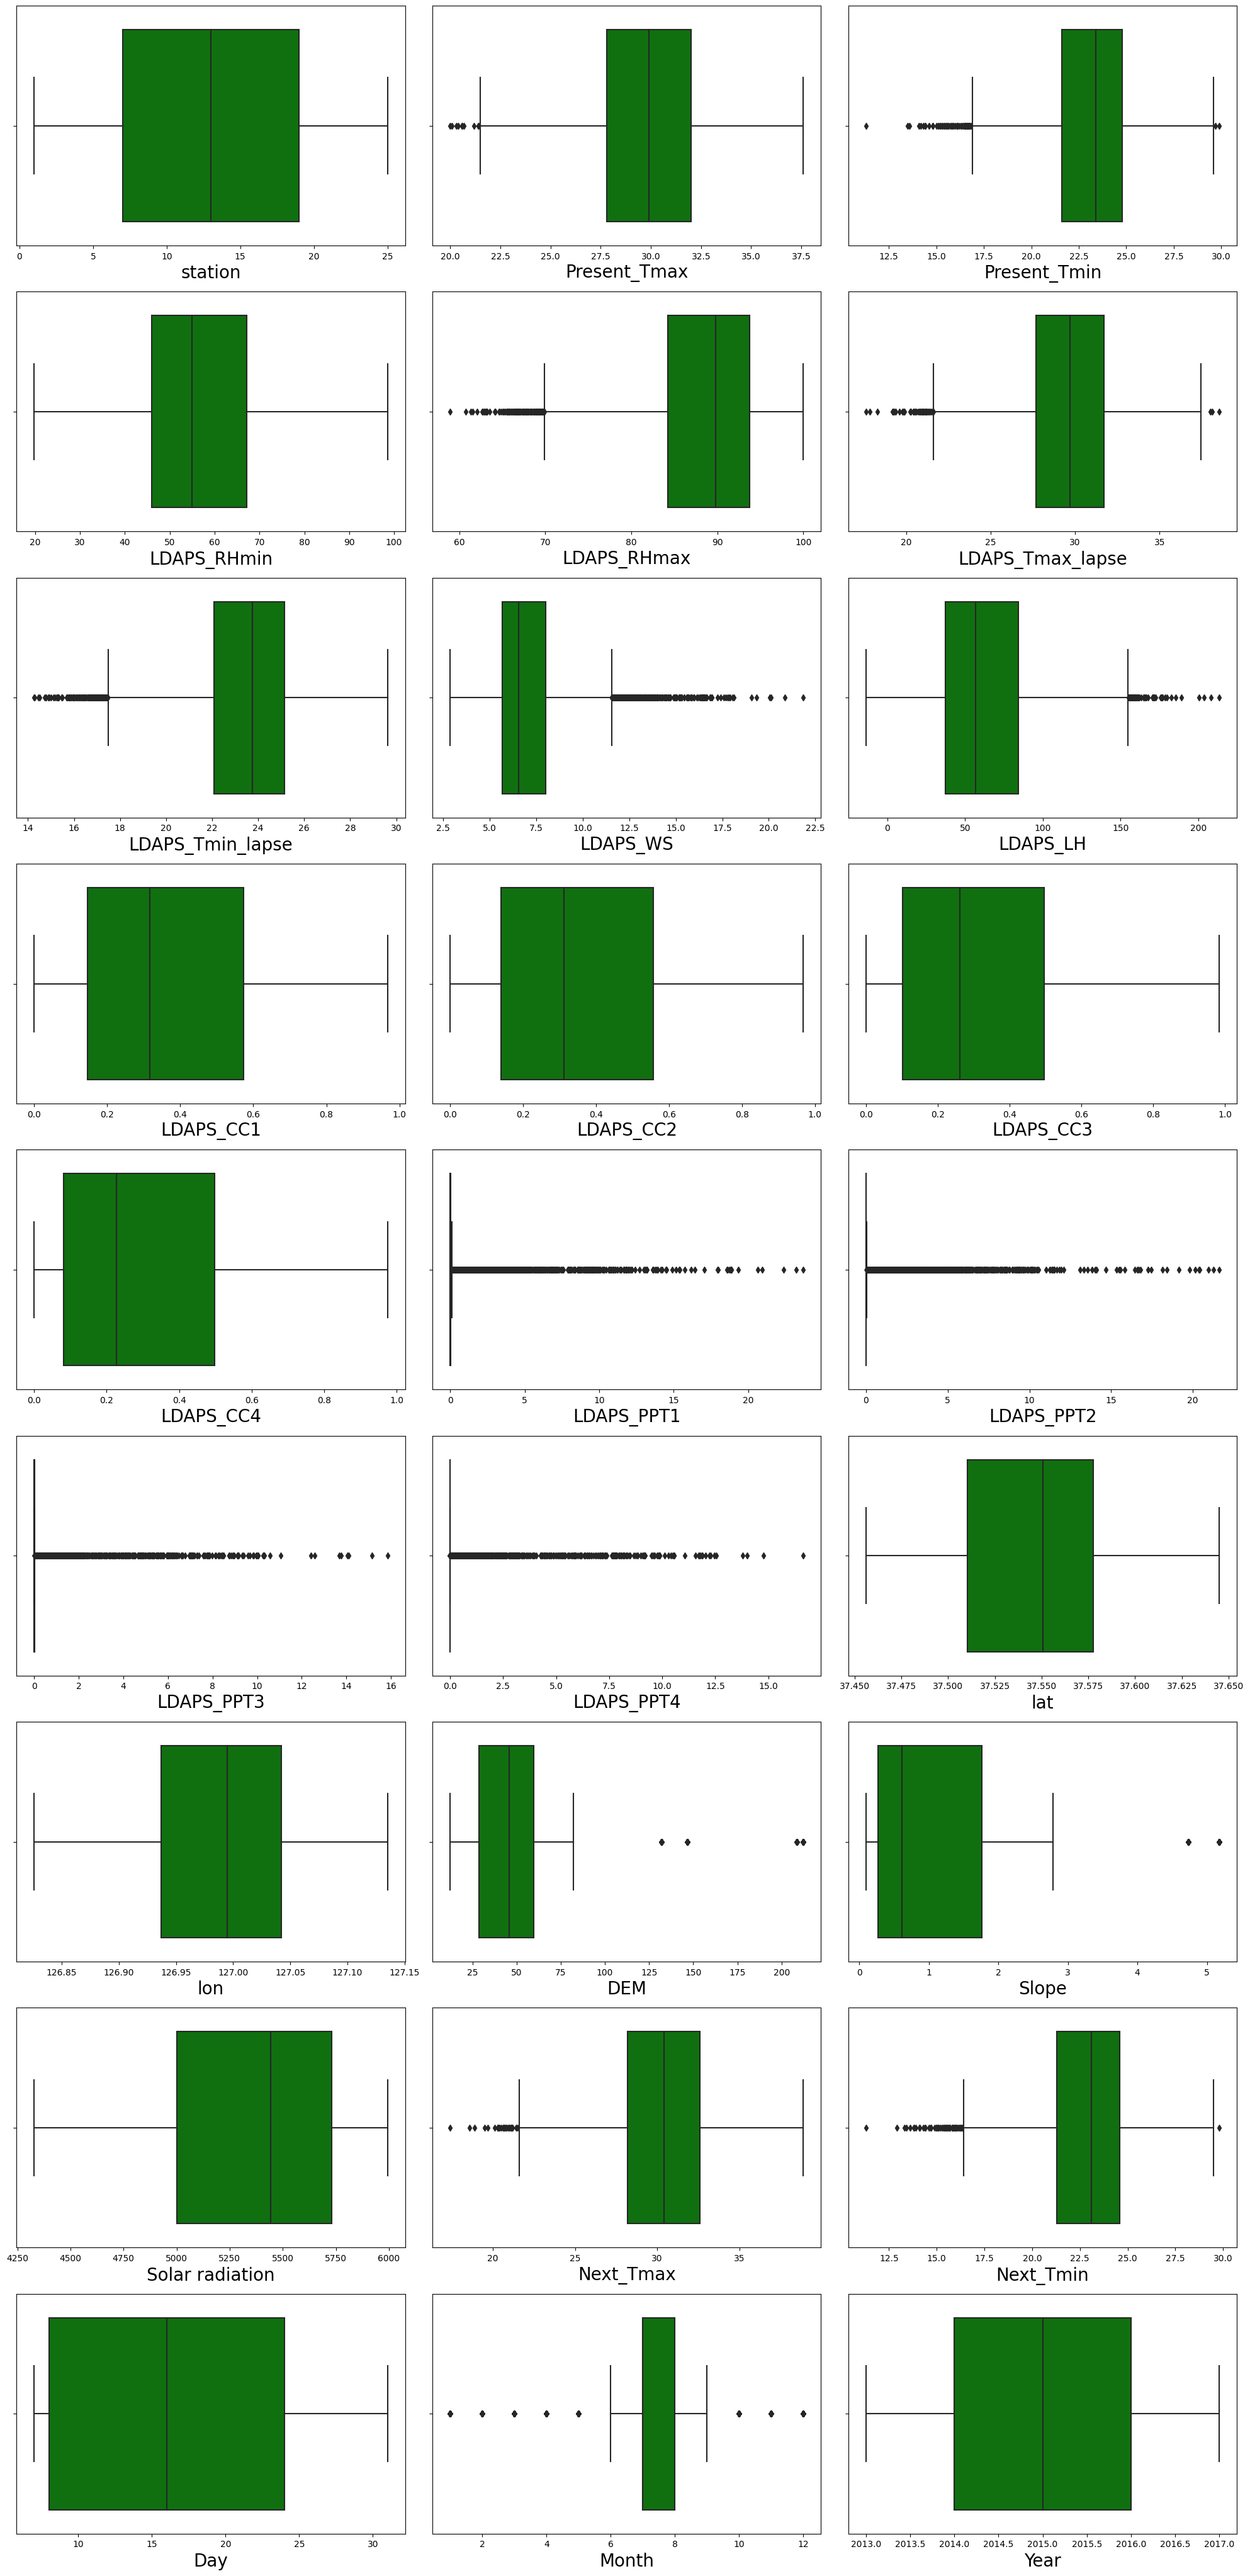

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 45), facecolor='white')
plotnumber = 1

for column in df.select_dtypes(include='number'):  # Only select numerical columns
    if plotnumber <= 29:
        ax = plt.subplot(10, 3, plotnumber)
        sns.boxplot(data=df, x=column, color='g')
        plt.xlabel(column, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()


In [34]:
df.shape

(7752, 28)

In [41]:
df.dropna(inplace=True)

In [42]:
df.shape

(7588, 28)

In [43]:
from scipy.stats import zscore

# Select only numeric columns for z-score calculation
numeric_columns = df.select_dtypes(include=['number'])

# Calculate z-scores for numeric columns
z = np.abs(zscore(numeric_columns))
threshold = 3

# Filter the DataFrame to exclude rows with outliers
df1 = df[(z < threshold).all(axis=1)]


In [44]:
df1.shape

(6739, 28)

In [46]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Day                 0.245563
Month              -0.703092
Year                0.013575
dtype: float64

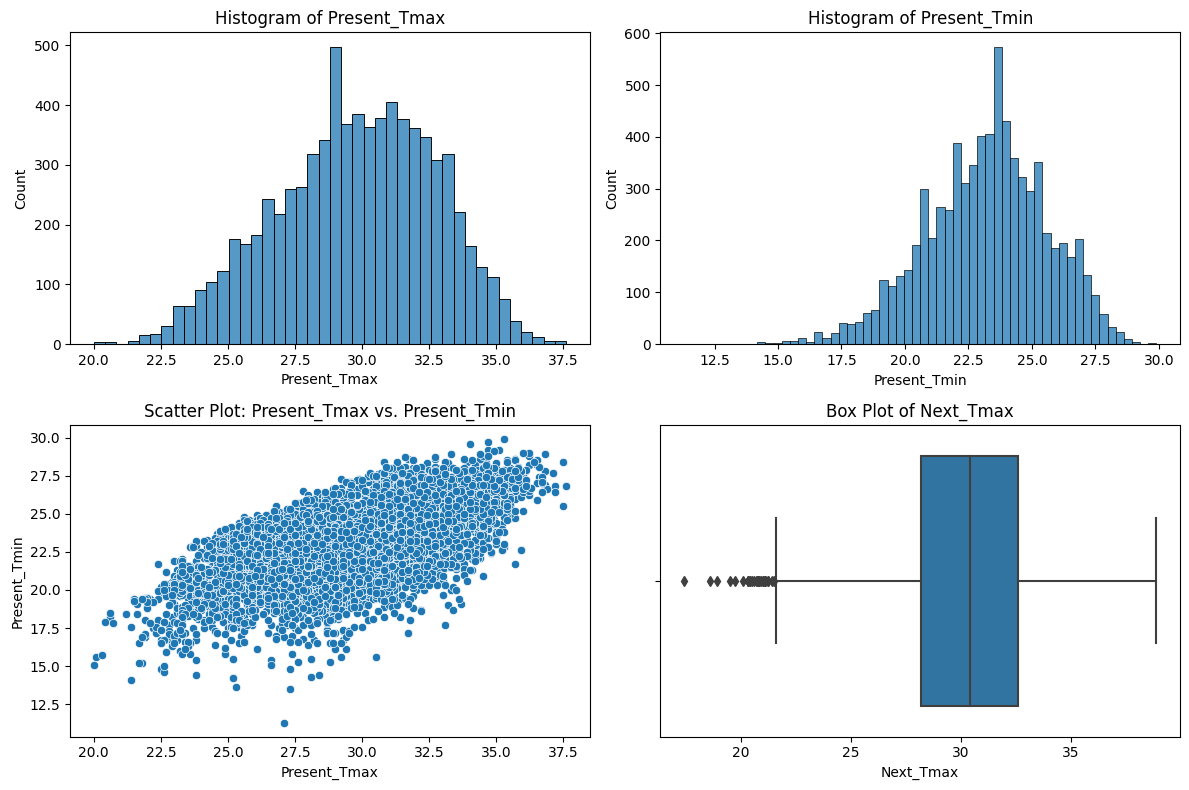

In [47]:


# Create a figure and axis for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot 1: Histogram of a numerical variable (e.g., 'Present_Tmax')
sns.histplot(df['Present_Tmax'], ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Present_Tmax')

# Plot 2: Histogram of another numerical variable (e.g., 'Present_Tmin')
sns.histplot(df['Present_Tmin'], ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Present_Tmin')

# Plot 3: Scatter plot between two numerical variables (e.g., 'Present_Tmax' vs. 'Present_Tmin')
sns.scatterplot(x='Present_Tmax', y='Present_Tmin', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot: Present_Tmax vs. Present_Tmin')

# Plot 4: Box plot of a numerical variable (e.g., 'Next_Tmax')
sns.boxplot(x='Next_Tmax', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Next_Tmax')

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()


In [48]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113301      0.133282    -0.067846   
Present_Tmax      0.113301      1.000000      0.615208    -0.209059   
Present_Tmin      0.133282      0.615208      1.000000     0.122200   
LDAPS_RHmin      -0.067846     -0.209059      0.122200     1.000000   
LDAPS_RHmax      -0.169351     -0.306943     -0.018576     0.578358   
LDAPS_Tmax_lapse  0.069856      0.573777      0.467904    -0.569580   
LDAPS_Tmin_lapse  0.105277      0.628705      0.772061     0.085237   
LDAPS_WS          0.005822     -0.125952     -0.038779     0.289422   
LDAPS_LH         -0.132129      0.134246     -0.012817    -0.072195   
LDAPS_CC1         0.006539     -0.316333      0.084348     0.612831   
LDAPS_CC2         0.003526     -0.216976      0.090038     0.744774   
LDAPS_CC3        -0.000161     -0.146391     -0.004719     0.688069   
LDAPS_CC4         0.005005     -0.143069     -0.046694     0.513937   
LDAPS_PPT1       -0.001954     -0.114917      0.111577     0.259039   
LDAPS_PPT2       -0.007635     -0.104779      0.066207     0.389572   
LDAPS_PPT3       -0.013865     -0.127248     -0.052428     0.237512   
LDAPS_PPT4       -0.011085     -0.107295     -0.070391     0.167311   
lat              -0.239118     -0.054134     -0.081417     0.085027   
lon              -0.118845      0.007695     -0.045174    -0.077590   
DEM              -0.256706     -0.189439     -0.254084     0.100684   
Slope            -0.091721     -0.107079     -0.148423     0.122454   
Solar radiation  -0.021194     -0.022114      0.059765     0.242168   
Next_Tmax         0.107747      0.610357      0.463523    -0.446824   
Next_Tmin         0.128184      0.621048      0.796975     0.093249   
Day              -0.000996     -0.154366     -0.115693    -0.063464   
Month             0.001211     -0.003266     -0.010210    -0.053499   
Year              0.001474      0.056002      0.037457    -0.002147   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.169351          0.069856          0.105277  0.005822   
Present_Tmax        -0.306943          0.573777          0.628705 -0.125952   
Present_Tmin        -0.018576          0.467904          0.772061 -0.038779   
LDAPS_RHmin          0.578358         -0.569580          0.085237  0.289422   
LDAPS_RHmax          1.000000         -0.377293         -0.118965  0.131269   
LDAPS_Tmax_lapse    -0.377293          1.000000          0.653425 -0.316011   
LDAPS_Tmin_lapse    -0.118965          0.653425          1.000000 -0.134652   
LDAPS_WS             0.131269         -0.316011         -0.134652  1.000000   
LDAPS_LH             0.238986          0.043663         -0.139675  0.004427   
LDAPS_CC1            0.435937         -0.440878          0.008714  0.285349   
LDAPS_CC2            0.390620         -0.525380          0.046537  0.257226   
LDAPS_CC3            0.224734         -0.542728         -0.044998  0.238155   
LDAPS_CC4            0.127242         -0.429739         -0.079536  0.218870   
LDAPS_PPT1           0.268019         -0.115659          0.034956  0.141503   
LDAPS_PPT2           0.227581         -0.248369         -0.002743  0.181634   
LDAPS_PPT3           0.132436         -0.193749         -0.093116  0.147199   
LDAPS_PPT4           0.118101         -0.170415         -0.103541  0.134428   
lat                  0.194820         -0.044052         -0.099452  0.033025   
lon                  0.025563          0.091568         -0.024703 -0.063009   
DEM                  0.176557         -0.181433         -0.198396  0.188540   
Slope                0.219436         -0.163891         -0.187864  0.169223   
Solar radiation      0.146622          0.047414          0.157763  0.120630   
Next_Tmax           -0.289788          0.835729          0.592119 -0.351107   
Next_Tmin           -0.076415          0.589963          0.886513 -0.102021   
Day                 -0.012226         -0.161320        

<Axes: >

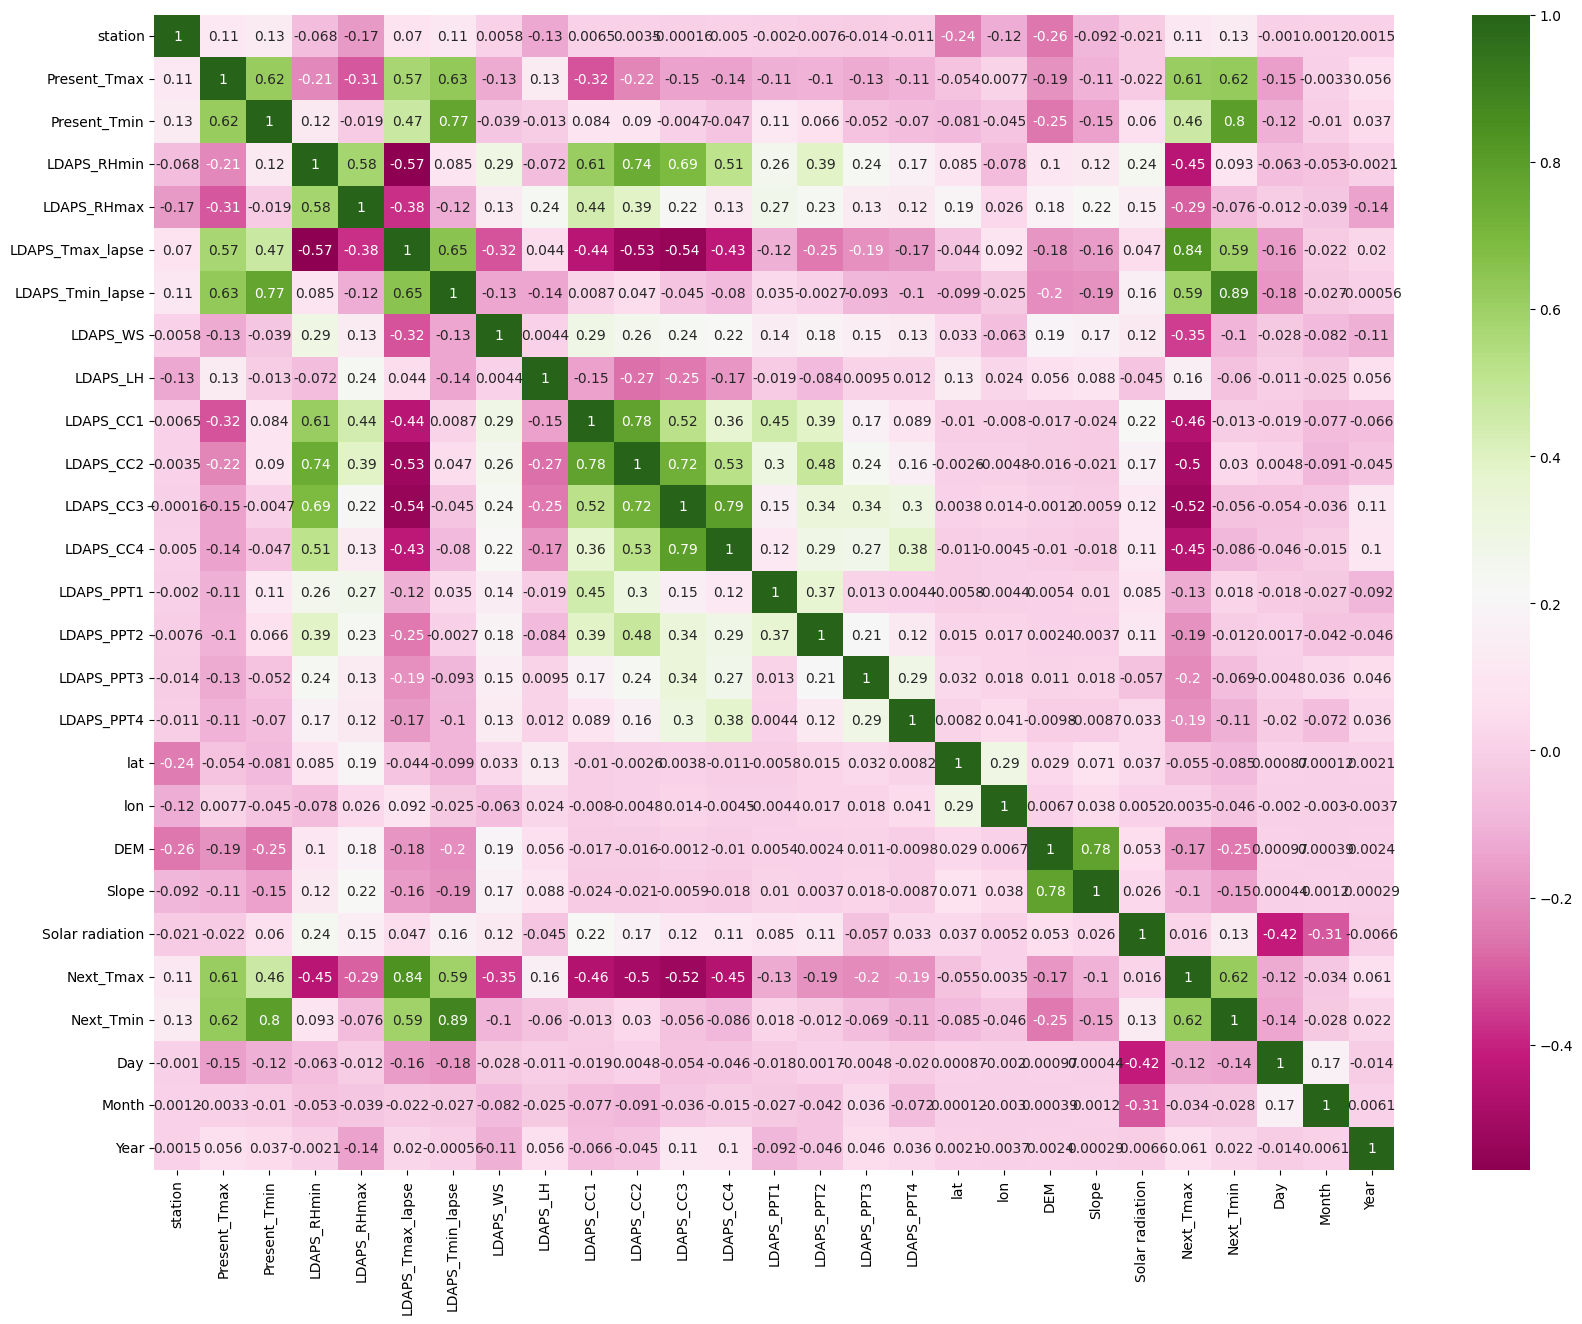

In [53]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='PiYG')

# Machine Learning Model Building For Next_Tmax


# Standard Scaling

In [54]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [56]:
from sklearn.preprocessing import StandardScaler

# Select only numerical columns for scaling
numerical_columns = df.select_dtypes(include=['number'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected numerical columns
X_scaled = scaler.fit_transform(numerical_columns)


# Checking Multicollinearity between features using variance_inflation_factor


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scaled,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values          Features
0     1.239908           station
1     2.953969              Date
2     3.543014      Present_Tmax
3     6.571694      Present_Tmin
4     2.316078       LDAPS_RHmin
5     9.298350       LDAPS_RHmax
6     9.796382  LDAPS_Tmax_lapse
7     1.357409  LDAPS_Tmin_lapse
8     1.582197          LDAPS_WS
9     3.558594          LDAPS_LH
10    5.355376         LDAPS_CC1
11    5.415897         LDAPS_CC2
12    3.056179         LDAPS_CC3
13    1.421664         LDAPS_CC4
14    1.500858        LDAPS_PPT1
15    1.272532        LDAPS_PPT2
16    1.284739        LDAPS_PPT3
17    1.236207        LDAPS_PPT4
18    1.182681               lat
19    3.370348               lon
20    3.111364               DEM
21    1.536837             Slope
22    5.078804   Solar radiation
23    6.724115         Next_Tmin
24    1.301998               Day
25    1.145940             Month
26    1.130854              Year

# Principal component analysis

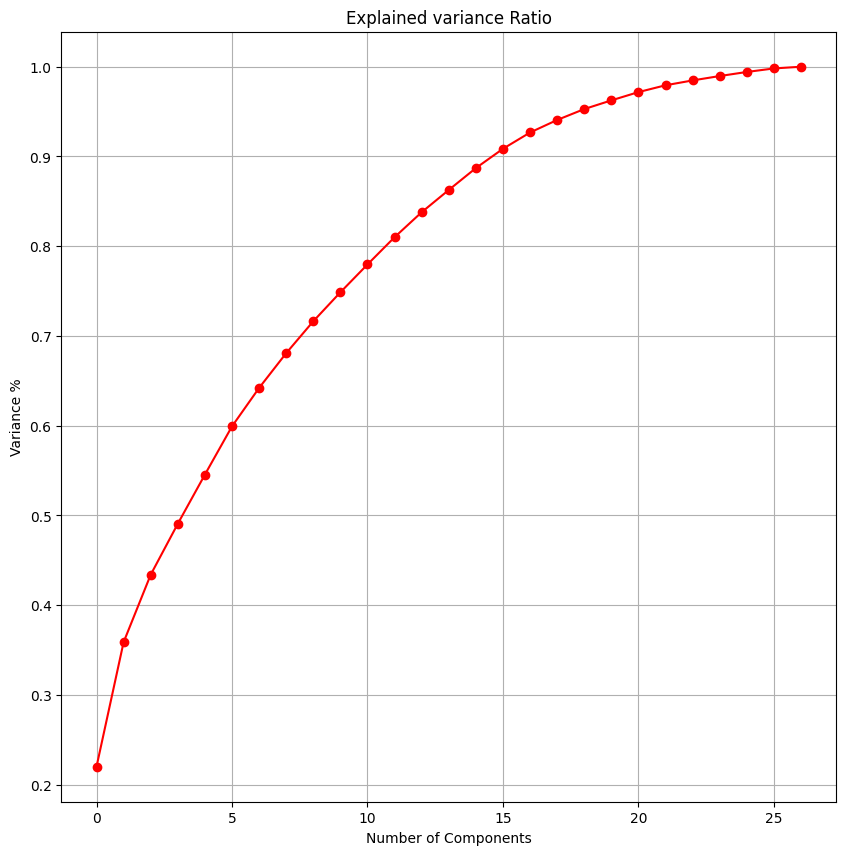

In [60]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [61]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scaled)

In [62]:
p_x=pd.DataFrame(x_new,columns=np.arange(15))


In [64]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 187.9 kB/s eta 0:08:51
   ---------------------------------------- 0.0/99.7 MB 187.9 kB/s eta 0:08:51
   ---------------------------------------- 0.0/99.7 MB 151.3 kB/s eta 0:10:59
   ---------------------------------------- 0.1/99.7 MB 204.8 kB/s eta 0:08:07
   ---------------------------------------- 0.1/99.7 MB 241.3 kB/s eta 0:06:53
   ---------------------------------------- 0.1/99

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(p_x, Y, random_state=42, test_size=.33)

In [72]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [28.51447121 26.97106999 33.43277511 ... 29.91758498 33.68405729
 28.15611751]


Actual Wins:
 5226    28.7
6269    27.8
1777    33.6
1486    25.5
591     29.4
        ... 
7547    31.7
3889    32.3
6404    29.3
5907    35.4
30      28.9
Name: Next_Tmax, Length: 2505, dtype: float64


In [73]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.915329905157355
Mean squared error : 1.4591547446410642
Root Mean Squared Error: 1.2079547775645676


 R2 Score :
0.8464333054645379


In [77]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scaled, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 1.0


In [74]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.8209101796407182
Mean squared error : 1.1767343560878234
Root Mean Squared Error: 1.0847738732509293




 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.7803157684630736
Mean squared error : 1.0628257161676637
Root Mean Squared Error: 1.030934389846252




 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.1416367265469063
Mean squared error : 2.447001996007984
Root Mean Squared Error: 1.5642896138528772




 Error of  AdaBoostRegressor() :
Mean absolute error : 1.1087966890381276
Mean squared error : 1.9594497157040924
Root Mean Squared Error: 1.3998034560980668




 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.8914981866104761
Mean squared error : 1.3781425377695538
Root Mean Squared Error: 1.1739431578102721




 Error of  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, devic

In [79]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scaled, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.9997628871393477


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.9997123840257418


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.9995741403745398


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.9932598169532962


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.9998378461793462


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max

In [84]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 10, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print(r2_score(Y_test,y_pred)) 


Mean absolute error : 0.7755356811097044
Mean squared error : 1.0574346533227252
Root Mean Squared Error: 1.0283164169275552
0.8887117730354442


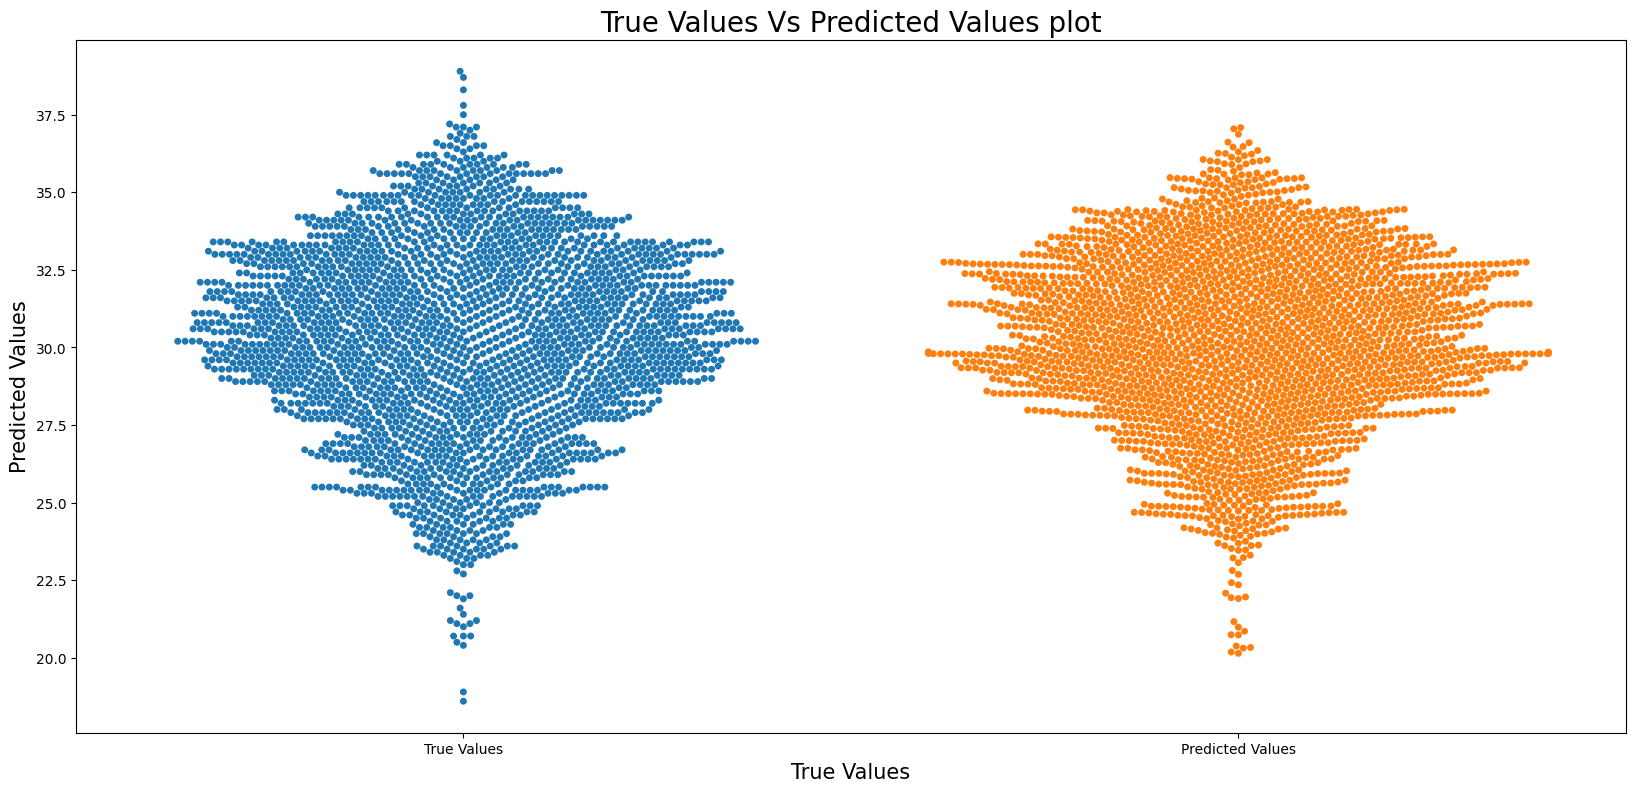

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Y_test and y_pred are both pandas Series or NumPy arrays
data = pd.DataFrame({'True Values': Y_test.round(2), 'Predicted Values': y_pred})

plt.figure(figsize=(20, 9))
sns.swarmplot(data=data)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title('True Values Vs Predicted Values plot', fontsize=20)
plt.show()


# Final Regression Saving Model


In [87]:
import joblib
joblib.dump(Final_mod,'Next_Tmax_Forecast_Final.pkl')

['Next_Tmax_Forecast_Final.pkl']

# Machine Learning Model Building For Next_Tmin


# Standard Scaling


In [89]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmin'], axis =1)
Y = df['Next_Tmin']

In [91]:
from sklearn.preprocessing import StandardScaler

# Select only numerical columns for scaling
numerical_columns = df.select_dtypes(include=['number'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected numerical columns
X_scaled = scaler.fit_transform(numerical_columns)

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=.33)

In [97]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('Predicted_Temp:',y_pred)
print('\n')
print('Actual_Temp:',Y_test)

Predicted_Temp: [24.5 21.5 24.7 ... 23.2 28.3 22.3]


Actual_Temp: 5226    24.5
6269    21.5
1777    24.7
1486    22.5
591     23.3
        ... 
7547    24.5
3889    25.7
6404    23.2
5907    28.3
30      22.3
Name: Next_Tmin, Length: 2505, dtype: float64


In [98]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 1.7366458681402049e-15
Mean squared error : 6.992362291228482e-30
Root Mean Squared Error: 2.6443075258427265e-15


 R2 Score :
1.0


In [100]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scaled, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 1.0


# Applying other ML Models


In [101]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 



 Error of  RandomForestRegressor() :
Mean absolute error : 0.0008930139720778633
Mean squared error : 0.00012751097804392192
Root Mean Squared Error: 0.011292075896128307


 R2 Score :
0.9999787268906002


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.004122954091825861
Mean squared error : 0.00019163113772455075
Root Mean Squared Error: 0.013843089890792111


 R2 Score :
0.999968029496599


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.0010379241517103842
Mean squared error : 0.0002475049900199586
Root Mean Squared Error: 0.01573229131499791


 R2 Score :
0.9999587078633506


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.1615695436848993
Mean squared error : 0.04281401824528151
Root Mean Squared Error: 0.20691548575513025


 R2 Score :
0.9928571852561414


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.007197472241409971
Mean squared error : 0.0002052885726885925
Root Mean Squared Error: 0.014327894914766527


 R2 Score :
0.99

# Final Regression Model For Next_Tmin


In [103]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 8, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.0008674374883045851
Mean squared error : 0.00013793359508067725
Root Mean Squared Error: 0.011744513403316344


 R2 Score of Final Model :
0.9999769880483778




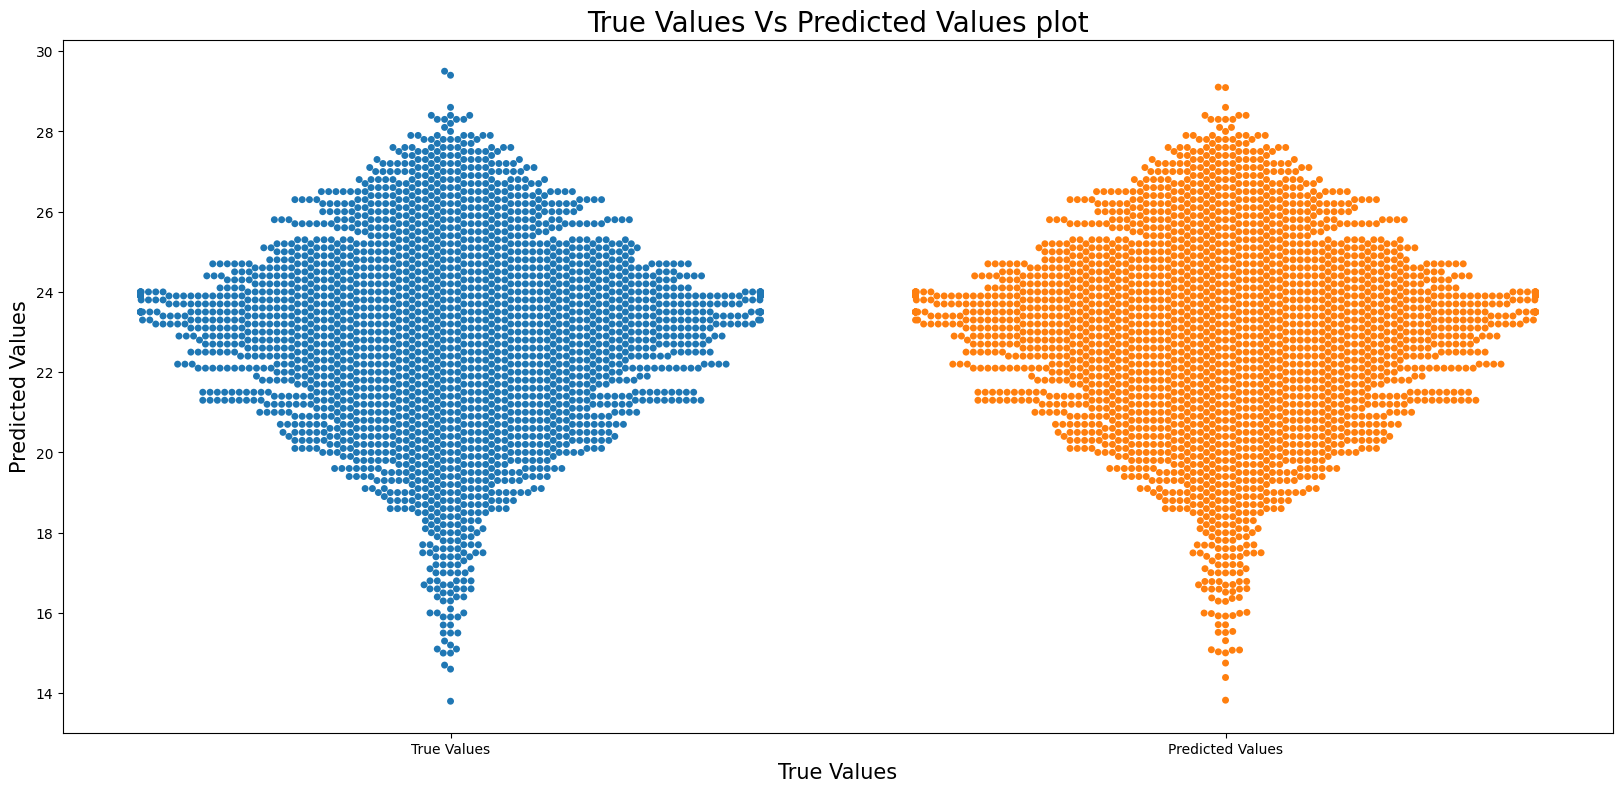

In [104]:
# Assuming Y_test and y_pred are both pandas Series or NumPy arrays
data = pd.DataFrame({'True Values': Y_test.round(2), 'Predicted Values': y_pred})

plt.figure(figsize=(20, 9))
sns.swarmplot(data=data)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title('True Values Vs Predicted Values plot', fontsize=20)
plt.show()

# Saving Final Regression Model For Next_Tmin


In [105]:
import joblib
joblib.dump(Final_mod,'Next_Tmin_Forecast_Final.pkl')

['Next_Tmin_Forecast_Final.pkl']